In [2]:
#ONLY RUN THIS BLOCK ONCE!

import os
import sys
from pathlib import Path
from importlib import reload

PROJECT_ROOT = Path.cwd().parent.parent  # points to nl-pe/
SRC_PATH = PROJECT_ROOT / "src"
sys.path.insert(0, str(SRC_PATH))  # make nl_pe importable
os.chdir(PROJECT_ROOT)  

In [3]:
import nl_pe.ploting.trec as trec_plot 
reload(trec_plot)
from nl_pe.ploting.trec import plot_trec_metrics_vs_k

# TREC-Covid


### Acquistion functions for untuned GP, RBF (l = 1, sigma_signal = 1, sigma_obs = 1), vs. dense vs. dense oracle, 100 observations, gt_observations (no noise)

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

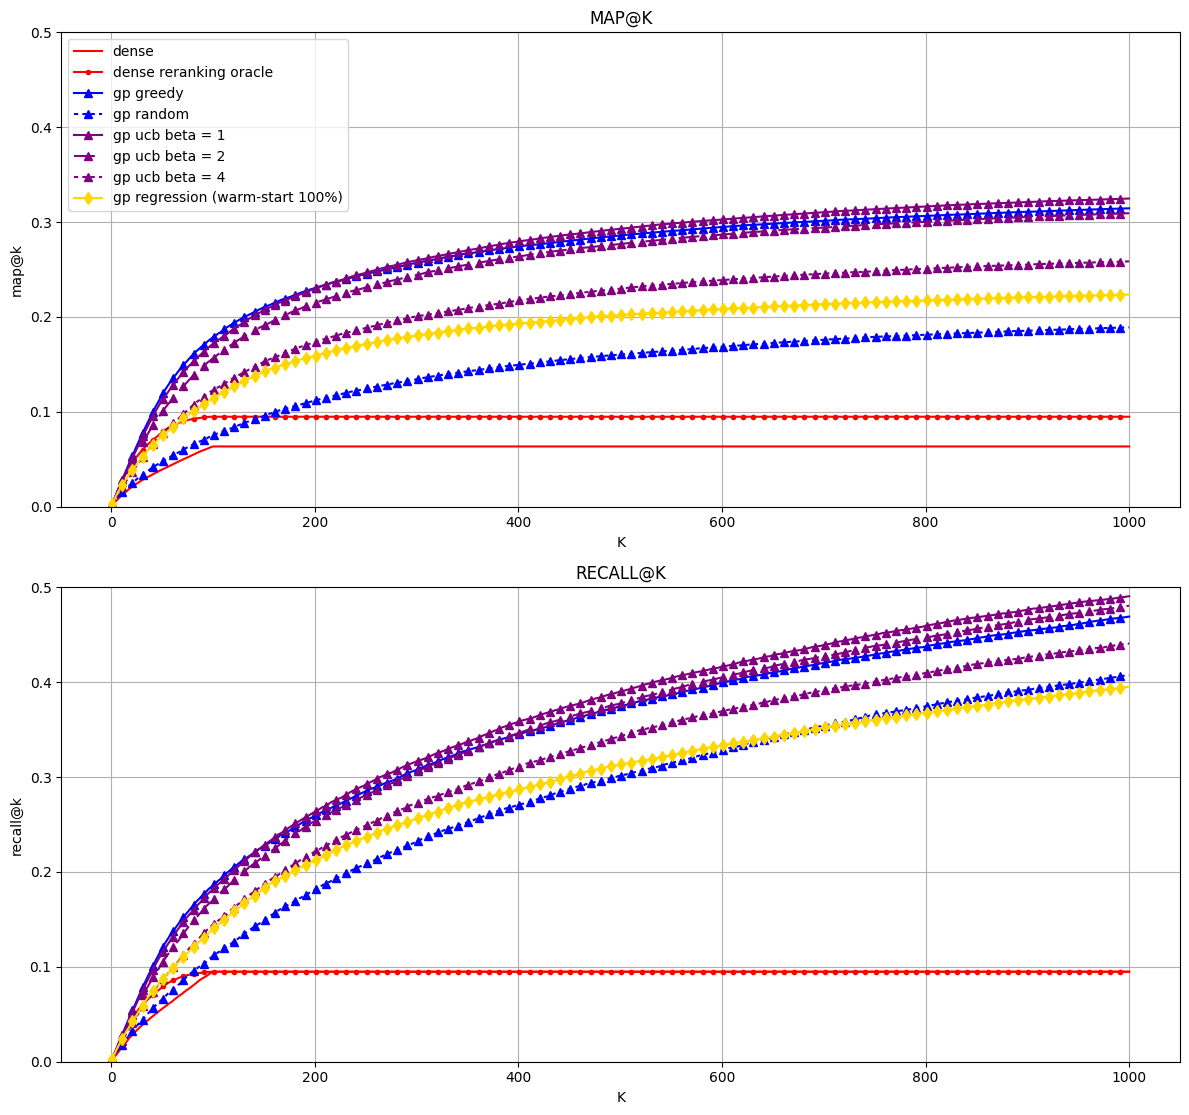

In [22]:
#fix oracle, check why warm start is so low? 
method_paths =  [
                'trials/ir/trec-covid/dense/miniLM',
                'trials/ir/trec-covid/oracle/miniLM/100',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/gr-eps/0',
                #'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/gr-eps/0.3',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/gr-eps/1',
                #'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/ts',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/ucb/beta1',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/ucb/beta2',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/ucb/beta4',
                #'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/lse/lse_margin',
                #'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/lse/lse_stradle/0',
                #'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/lse/lse_stradle/1',
                'trials/ir/trec-covid/gp/untuned/miniLM/no_refit/warm_start_100',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            #'gp greedy-epsilon (eps=0.3)',
            'gp random',
            #'gp TS',
            'gp ucb beta = 1',
            'gp ucb beta = 2',
            'gp ucb beta = 4',
            #'gp lse margin',
            #'gp lse straddle (kappa=0)',
            #'gp lse straddle (kappa=1)',
            'gp regression (warm-start 100%)',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    #{'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    #{'linestyle': 'solid',  'color': 'green', 'marker': 's', 'markevery': 10},
    #{'linestyle': (0, (10, 6)),  'color': 'green', 'marker': 's', 'markevery': 10},
    #{'linestyle': (0, (2, 2)),  'color': 'green', 'marker': 's', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'gold', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=1000, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "", y_mins=[0,0],y_maxs=[0.5,0.5
                                               ])


# D2


# NF Corpus: 
n_queries: 323

n_docs: 3.6K 

rel_docs_per_query: 38.2



## MiniLM

### Acquistion functions for untuned GP, RBF (l = 1, sigma_signal = 1, sigma_obs = 1), vs. dense vs. dense oracle, 100 observations, gt_observations (no noise)

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

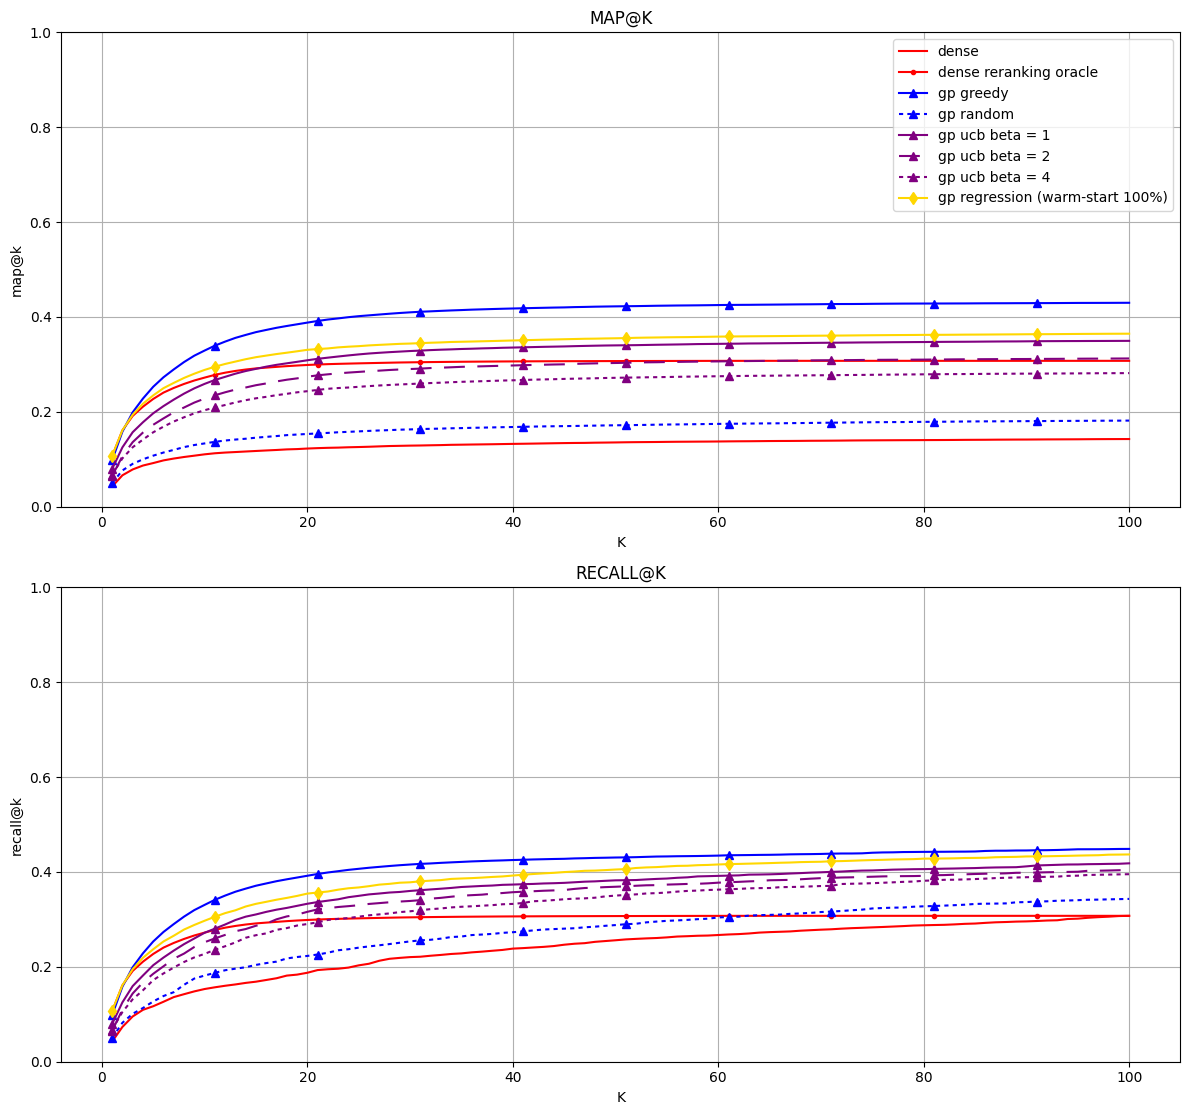

In [10]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/1',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ts',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/beta1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/beta2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/beta4',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/lse/margin',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/lse/straddle_kappa0',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/lse/straddle_kappa1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/warm_start_100',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            #'gp greedy-epsilon (eps=0.3)',
            'gp random',
            #'gp TS',
            'gp ucb beta = 1',
            'gp ucb beta = 2',
            'gp ucb beta = 4',
            #'gp lse margin',
            #'gp lse straddle (kappa=0)',
            #'gp lse straddle (kappa=1)',
            'gp regression (warm-start 100%)',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    #{'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    #{'linestyle': 'solid',  'color': 'green', 'marker': '^', 'markevery': 10},
    #{'linestyle': (0, (10, 6)),  'color': 'green', 'marker': '^', 'markevery': 10},
    #{'linestyle': (0, (2, 2)),  'color': 'green', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'gold', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "", y_mins=[0,0],y_maxs=[1,1])


### Refitting
Every 10 iters, LR = 0.1, 200 train iter, lengthscale refit only unless all params


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

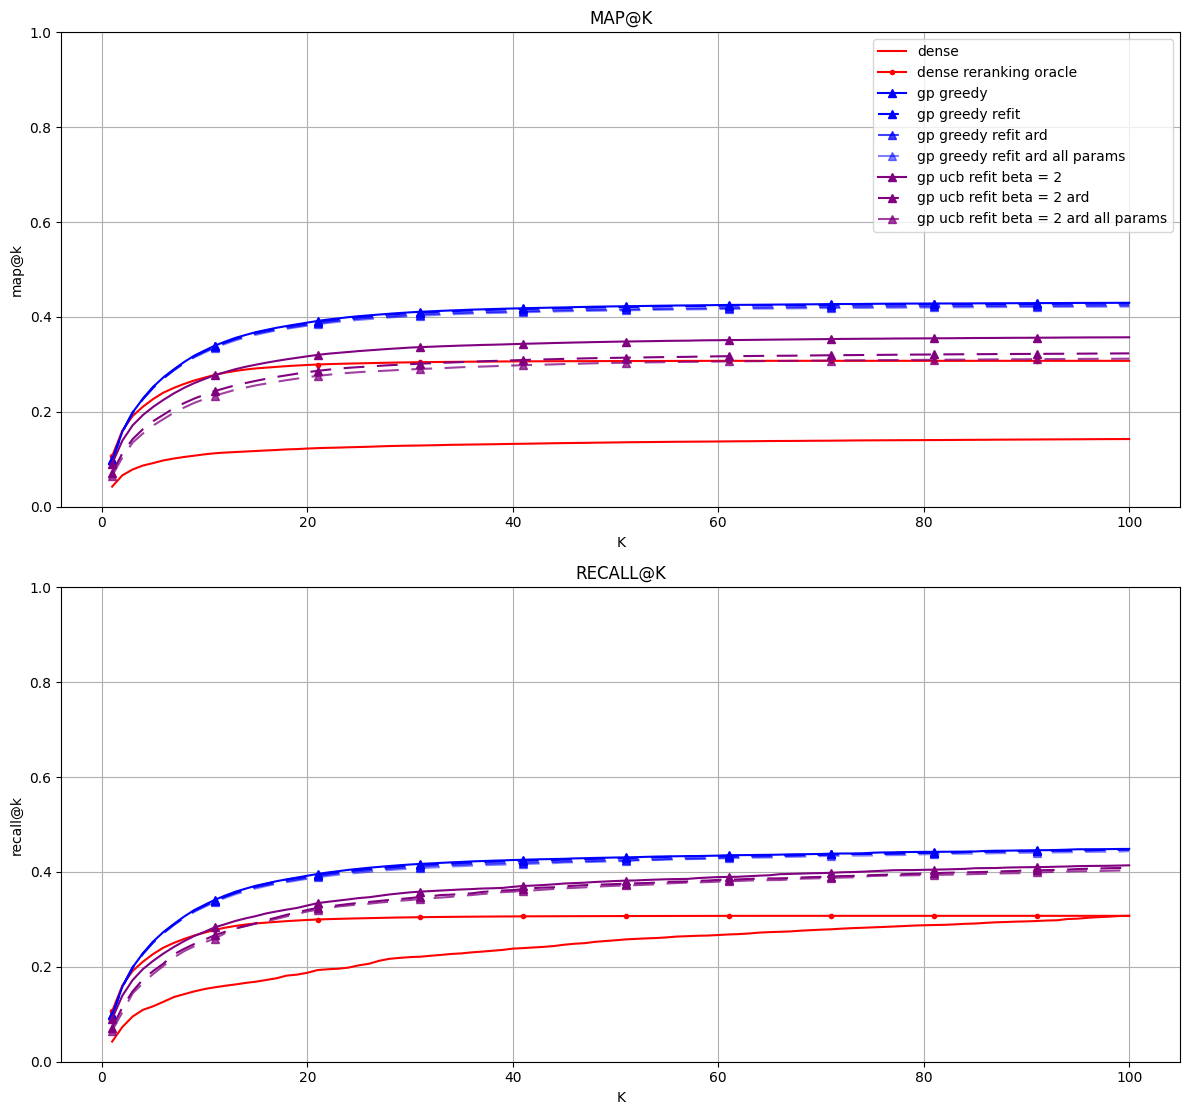

In [36]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/lr0.1_200_10obs/greedy_epsilon/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/lr0.1_200_10obs/ard/greedy_epsilon/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/all_params/lr0.1_200_10obs/ard/greedy_epsilon/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/lr0.1_200_10obs/ucb_const_beta/2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/lr0.1_200_10obs/ard/ucb_const_beta/2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/ls/all_params/lr0.1_200_10obs/ard/ucb_const_beta/2',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            'gp greedy refit',
            'gp greedy refit ard',
            'gp greedy refit ard all params',
            'gp ucb refit beta = 2',
            'gp ucb refit beta = 2 ard',
            'gp ucb refit beta = 2 ard all params',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10, 'alpha':0.75},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10, 'alpha':0.5},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10, 'alpha': 0.75},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


### Obs Noise 1, Sig Noise 0.01


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

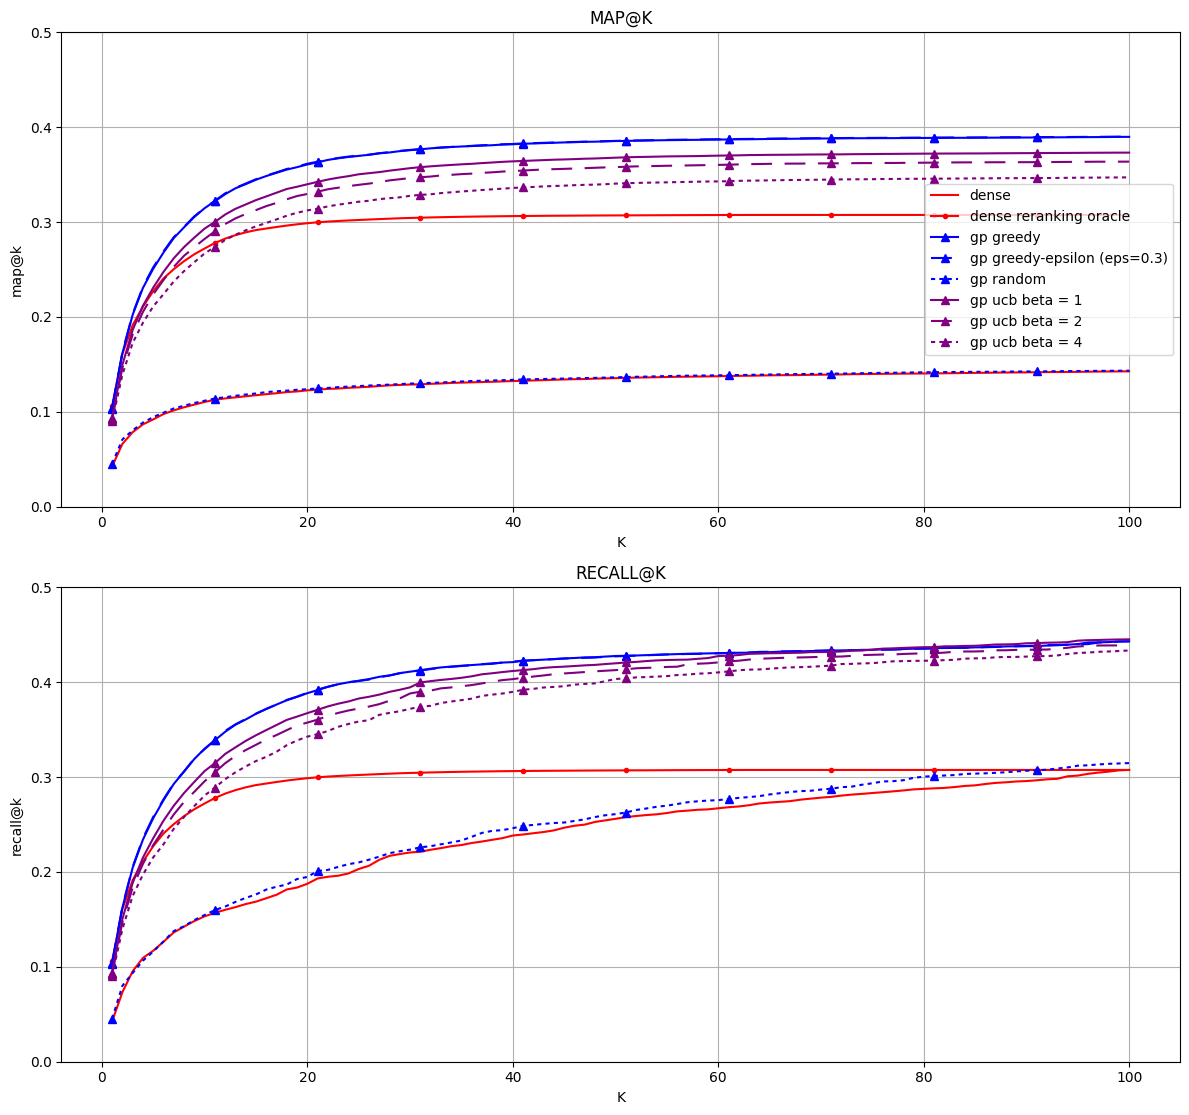

In [17]:
#obseravtion: ucb works best (relative to other methods) when signal noise is low (AND obs noise is low)

method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/gr-eps/1',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ts',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/ucb/beta1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/ucb/beta2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.01signoise/ucb/beta4',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/warm_start_100',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            'gp greedy-epsilon (eps=0.3)',
            'gp random',
            #'gp TS',
            'gp ucb beta = 1',
            'gp ucb beta = 2',
            'gp ucb beta = 4',
            #'gp regression (warm-start 100%)',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'gold', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "", y_mins=[0,0],y_maxs=[0.5,0.5])


### Obs Noise 0.001, Sig Noise 0.01

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

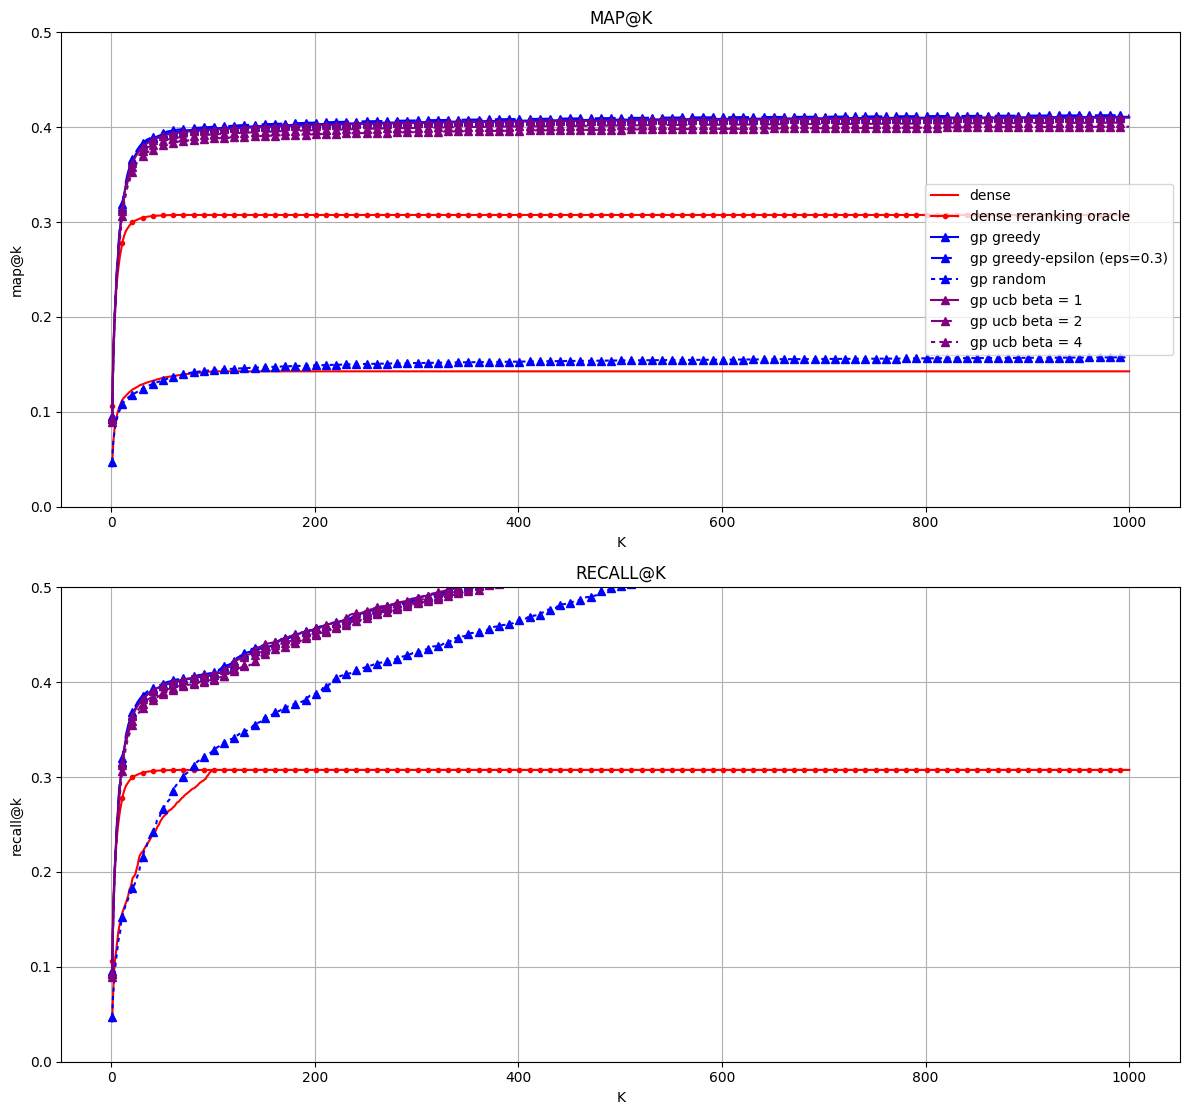

In [20]:
#obseravtion: ucb works best (relative to other methods) when signal noise is low (AND obs noise is low)

method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/gr-eps/1',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ts',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/ucb/beta1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/ucb/beta2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/0.01signoise/ucb/beta4',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/warm_start_100',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            'gp greedy-epsilon (eps=0.3)',
            'gp random',
            #'gp TS',
            'gp ucb beta = 1',
            'gp ucb beta = 2',
            'gp ucb beta = 4',
            #'gp regression (warm-start 100%)',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'gold', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=1000, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "", y_mins=[0,0],y_maxs=[0.5,0.5])


### Obs Noise 0.001, Sig Noise 1

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

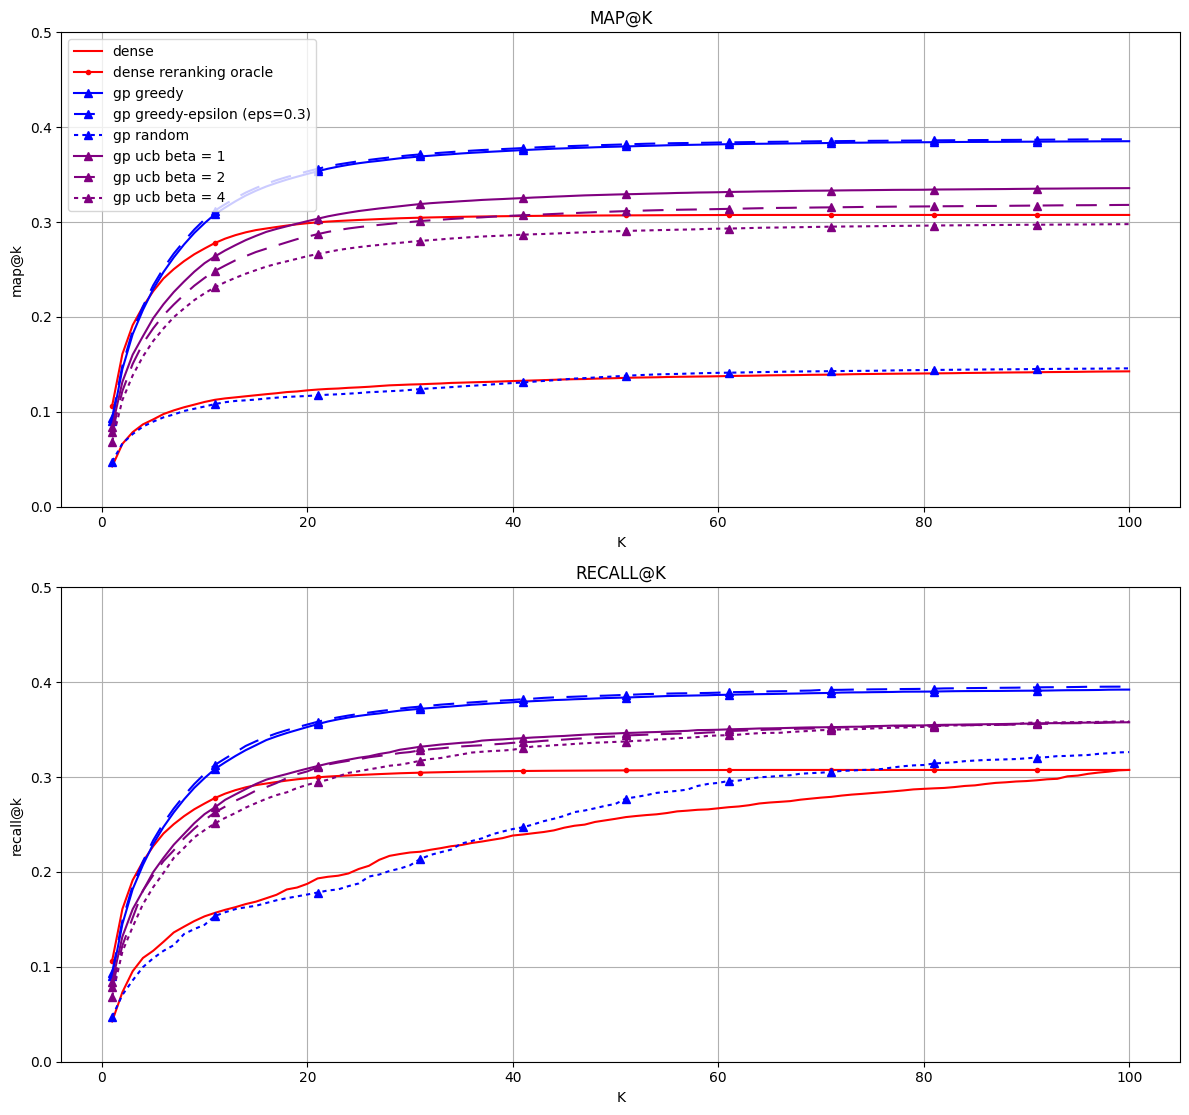

In [19]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/gr-eps/1',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ts',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/ucb/beta1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/ucb/beta2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/0.001obsnoise/1signoise/ucb/beta4',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/warm_start_100',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            'gp greedy-epsilon (eps=0.3)',
            'gp random',
            #'gp TS',
            'gp ucb beta = 1',
            'gp ucb beta = 2',
            'gp ucb beta = 4',
            #'gp regression (warm-start 100%)',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'gold', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "", y_mins=[0,0],y_maxs=[0.5,0.5])


### Fast pred test


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

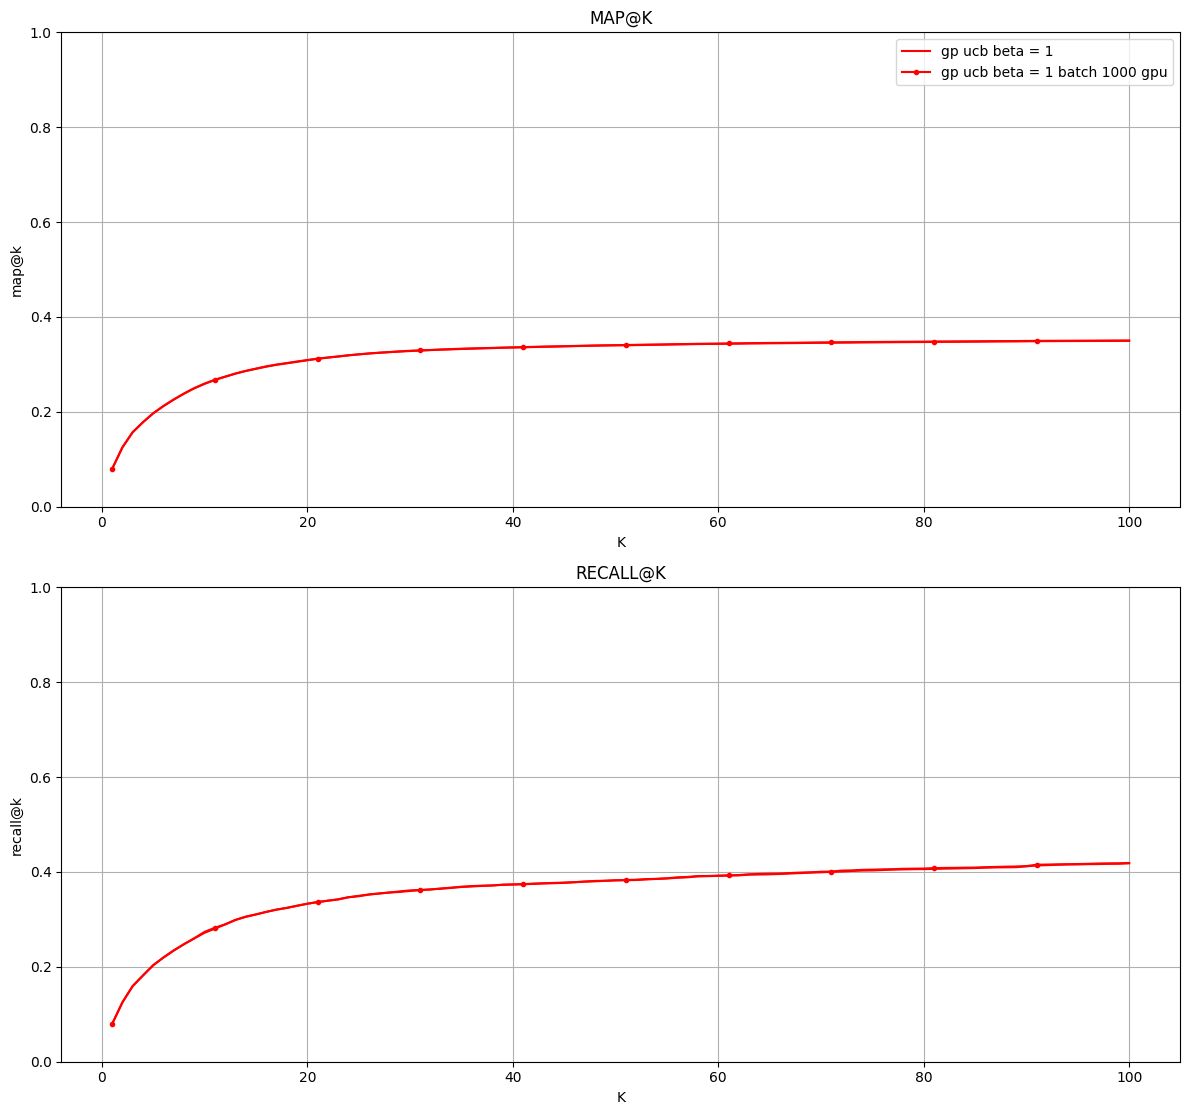

In [ ]:
method_paths =  [
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/beta1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/beta1_batch_1000_gpu',
                ]


method_names = [
            'gp ucb beta = 1',
            'gp ucb beta = 1 batch 1000 gpu',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


### Refitting effect: Untuned GP, RBF (l = 1, sigma_signal = 1, sigma_obs = 1) v.s. refit every k = {1,10} observations

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

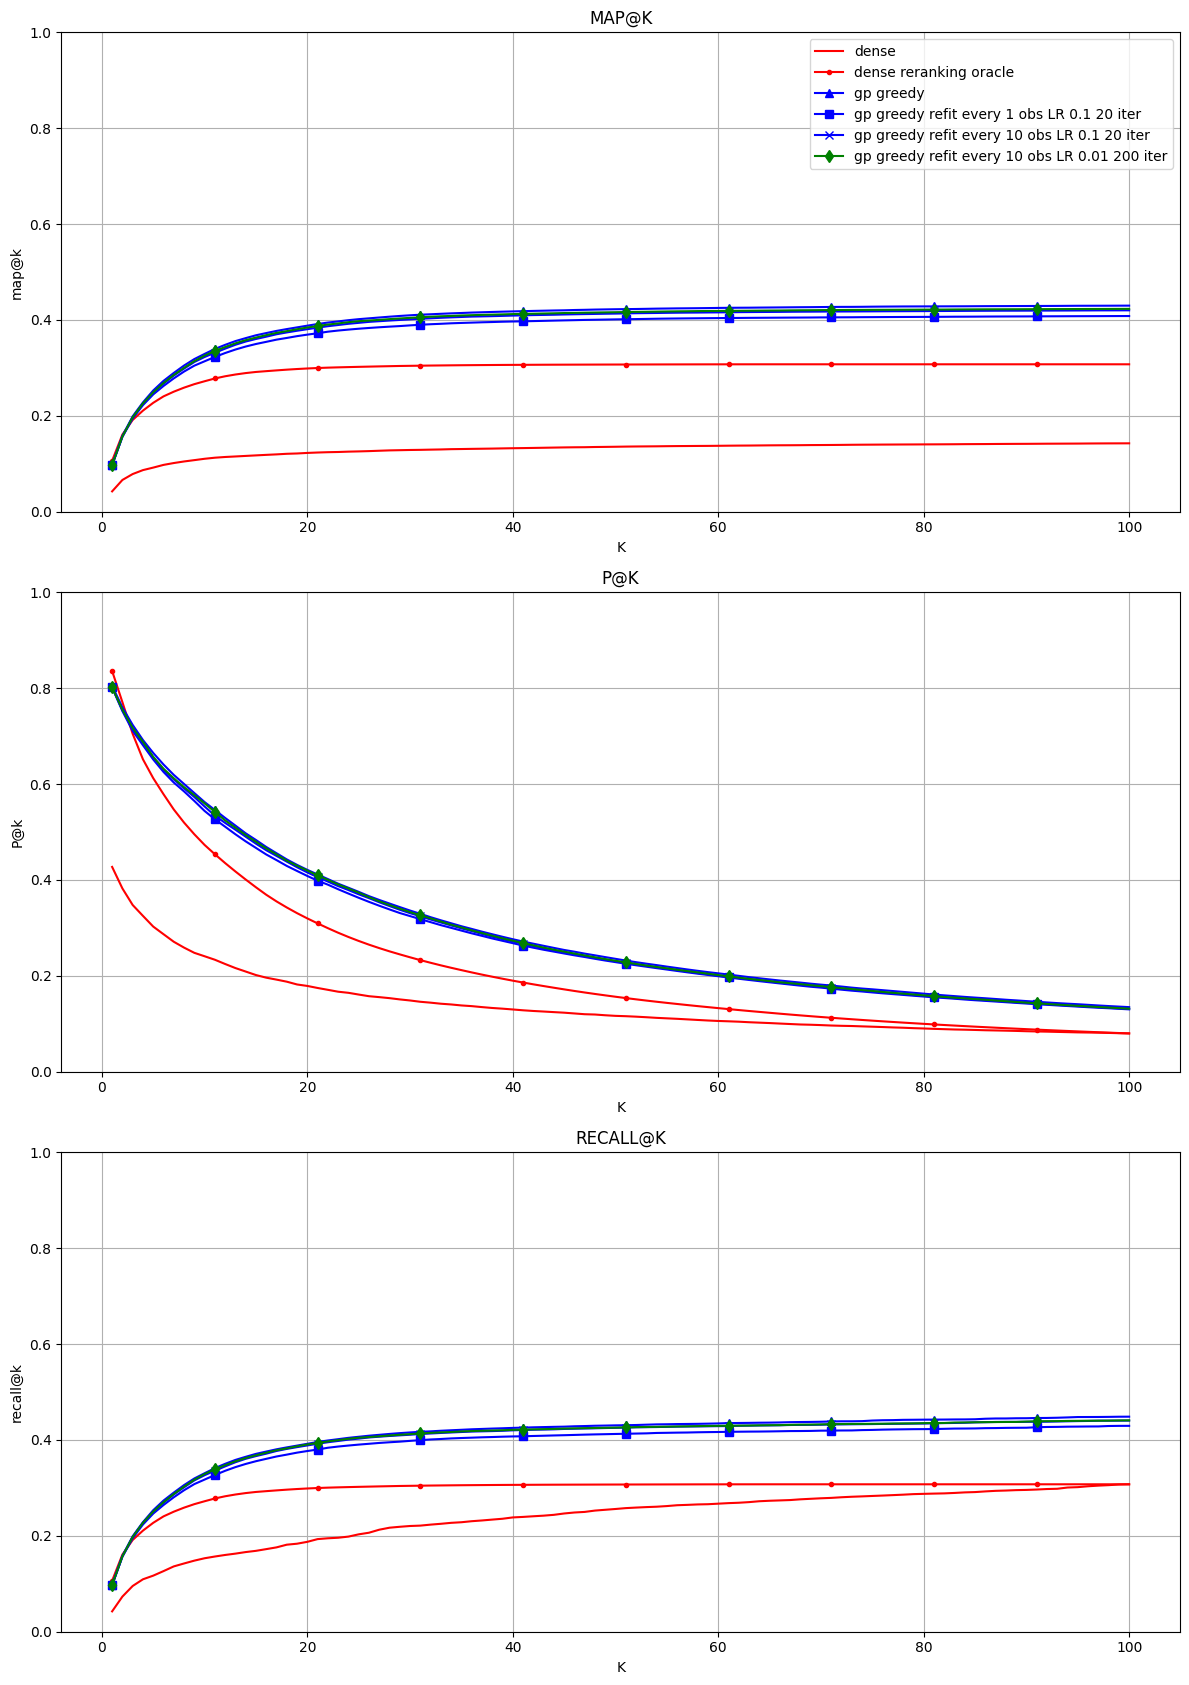

In [ ]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/refit_1/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/refit_10/lr_0.1_20_iter/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/refit/refit_10/lr_0.01_200_iter/gr-eps/0',
                ]


method_names = [
            'dense',
            'dense reranking oracle',
            'gp greedy',
            'gp greedy refit every 1 obs LR 0.1 20 iter',
            'gp greedy refit every 10 obs LR 0.1 20 iter',
            'gp greedy refit every 10 obs LR 0.01 200 iter',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': 's', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'blue', 'marker': 'x', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'green', 'marker': 'd', 'markevery': 10},
]

metrics = ['map', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

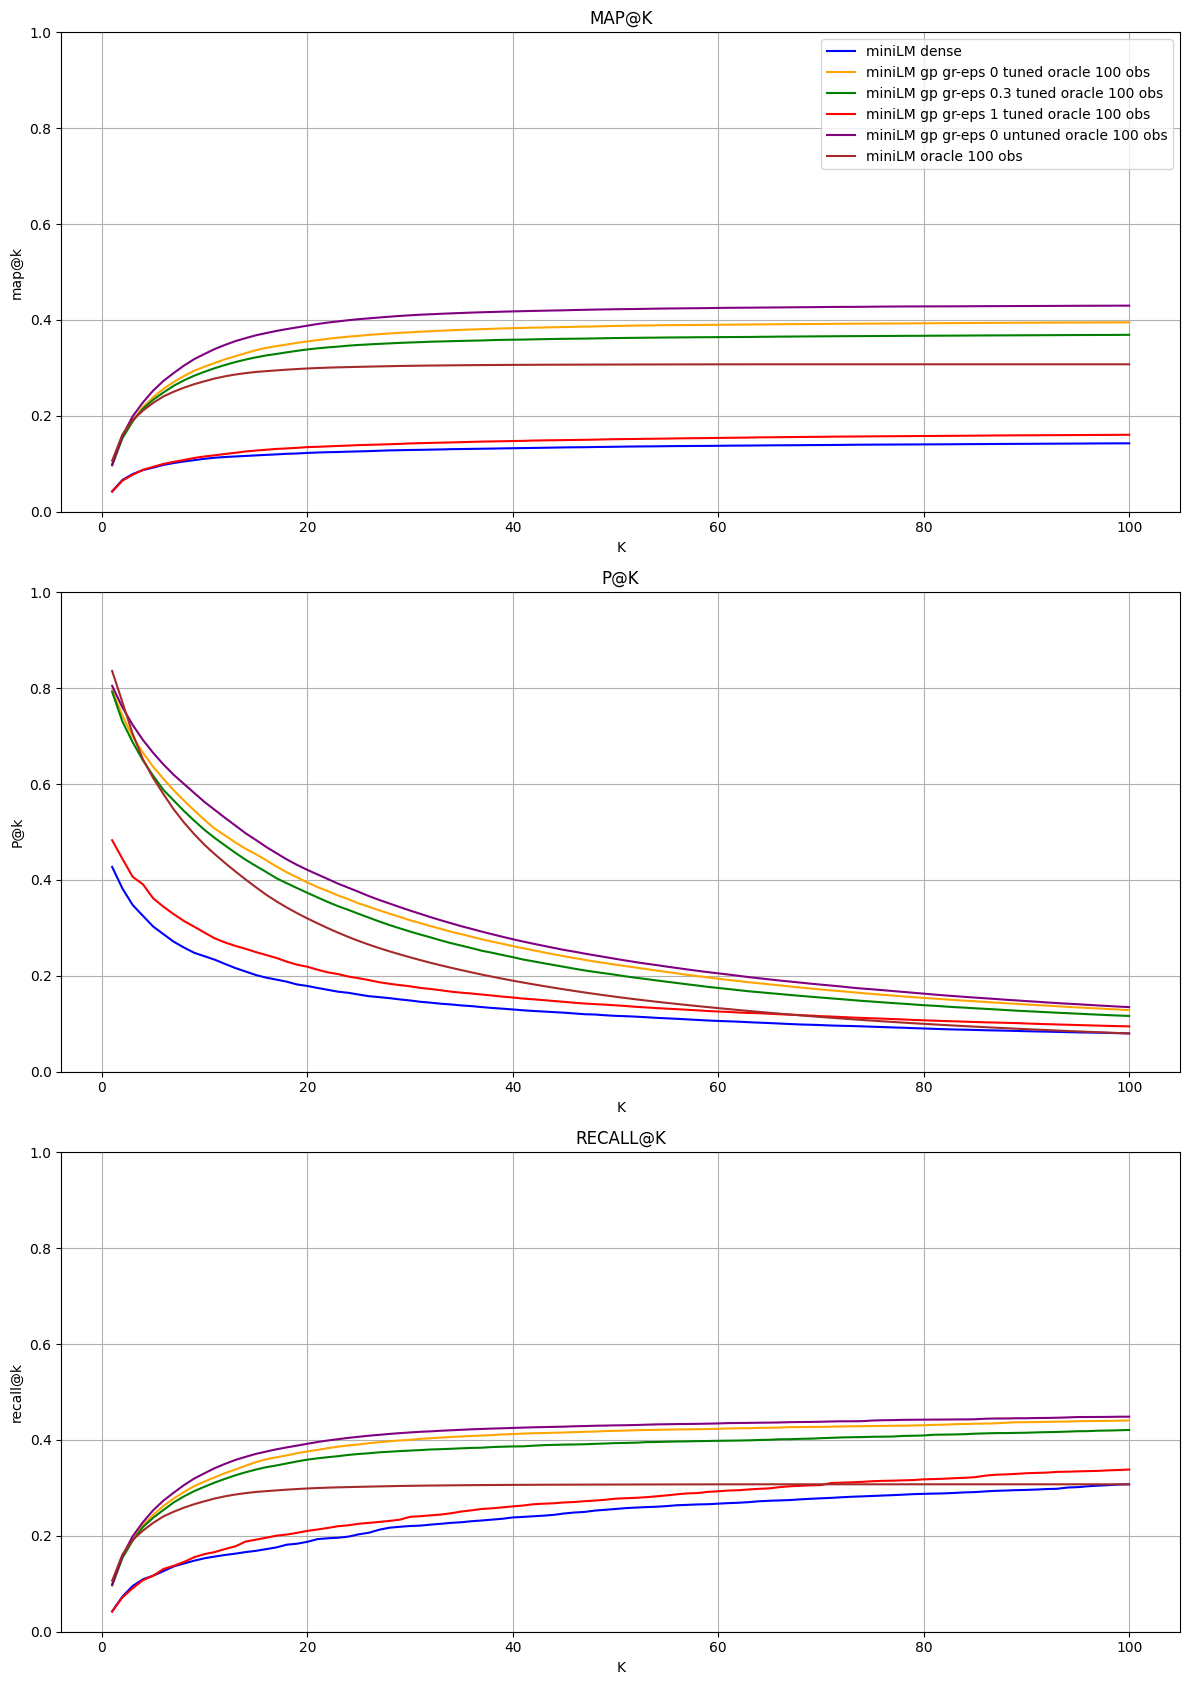

In [ ]:
#note this is gr-eps with added noise, ts implementation not checked
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/0',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/gr-eps/0.3',
                #'trials/ir/nfcorpus/gp/untuned/miniLM/gr-eps/1',
                #'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps-ts/0.1',
                #'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps-ts/0.3'
                ]

method_names = [
            'miniLM dense',
            'miniLM gp gr-eps 0 tuned oracle 100 obs',
            'miniLM gp gr-eps 0.3 tuned oracle 100 obs',
            'miniLM gp gr-eps 1 tuned oracle 100 obs',
            'miniLM gp gr-eps 0 untuned oracle 100 obs',
            'miniLM oracle 100 obs',
            #'miniLM gp gr-eps 0.3 untuned oracle 100 obs',
            #'miniLM gp gr-eps 1 untuned oracle 100 obs',
            #'miniLM gp gr-eps-ts 0.1 tuned oracle 100 obs',
            #'miniLM gp gr-eps-ts 0.3 tuned oracle 100 obs',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'solid', 'color': 'orange'},
    {'linestyle': 'solid', 'color': 'green'},
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'purple'},
    {'linestyle': 'solid', 'color': 'brown'},
    {'linestyle': 'solid', 'color': 'pink'},
    #{'linestyle': 'solid', 'color': 'cyan'},
    #{'linestyle': 'solid', 'color': 'magenta'},
    #{'linestyle': 'solid', 'color': 'red'},
    #{'linestyle': 'solid', 'color': 'purple'},
]

metrics = ['map', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


## Higher observation counts

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

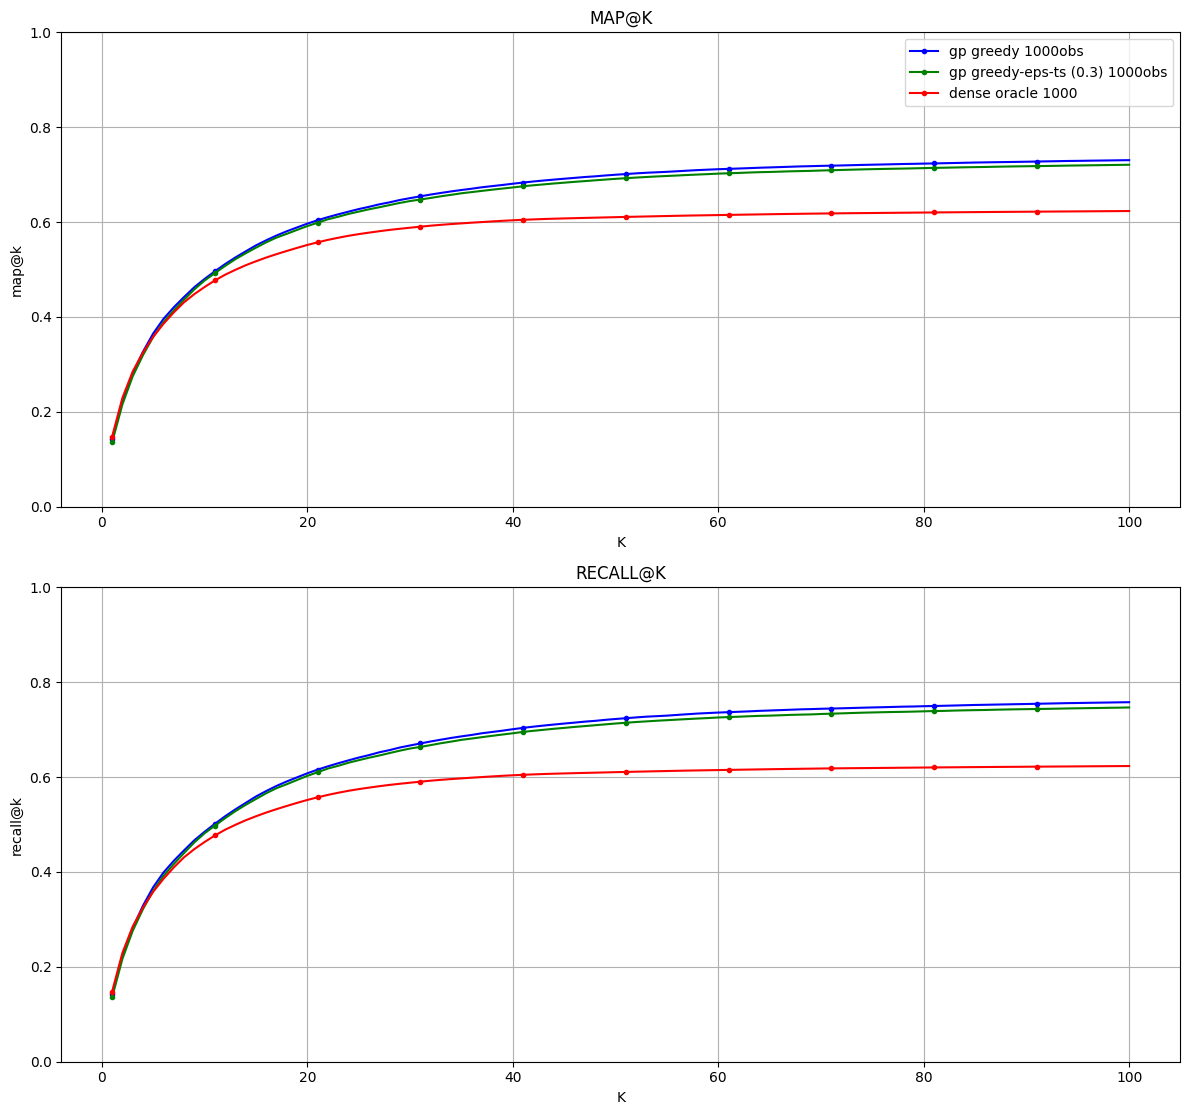

In [ ]:
method_paths =  [
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/1000_obs/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/1000_obs/gr-eps-ts/0.3',
                'trials/ir/nfcorpus/oracle/miniLM/1000',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/1000obs_w_covid/1000_obs_beta_1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ucb/1000obs_w_covid/1000_obs_beta_2',
                ]


method_names = [
            'gp greedy 1000obs',
            'gp greedy-eps-ts (0.3) 1000obs',
            'dense oracle 1000',
            'ucb beta = 1'
            'ucb beta = 2'
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'green', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'red', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)),  'color': 'purple', 'marker': '^', 'markevery': 10},
]


metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


## Query decomposition


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

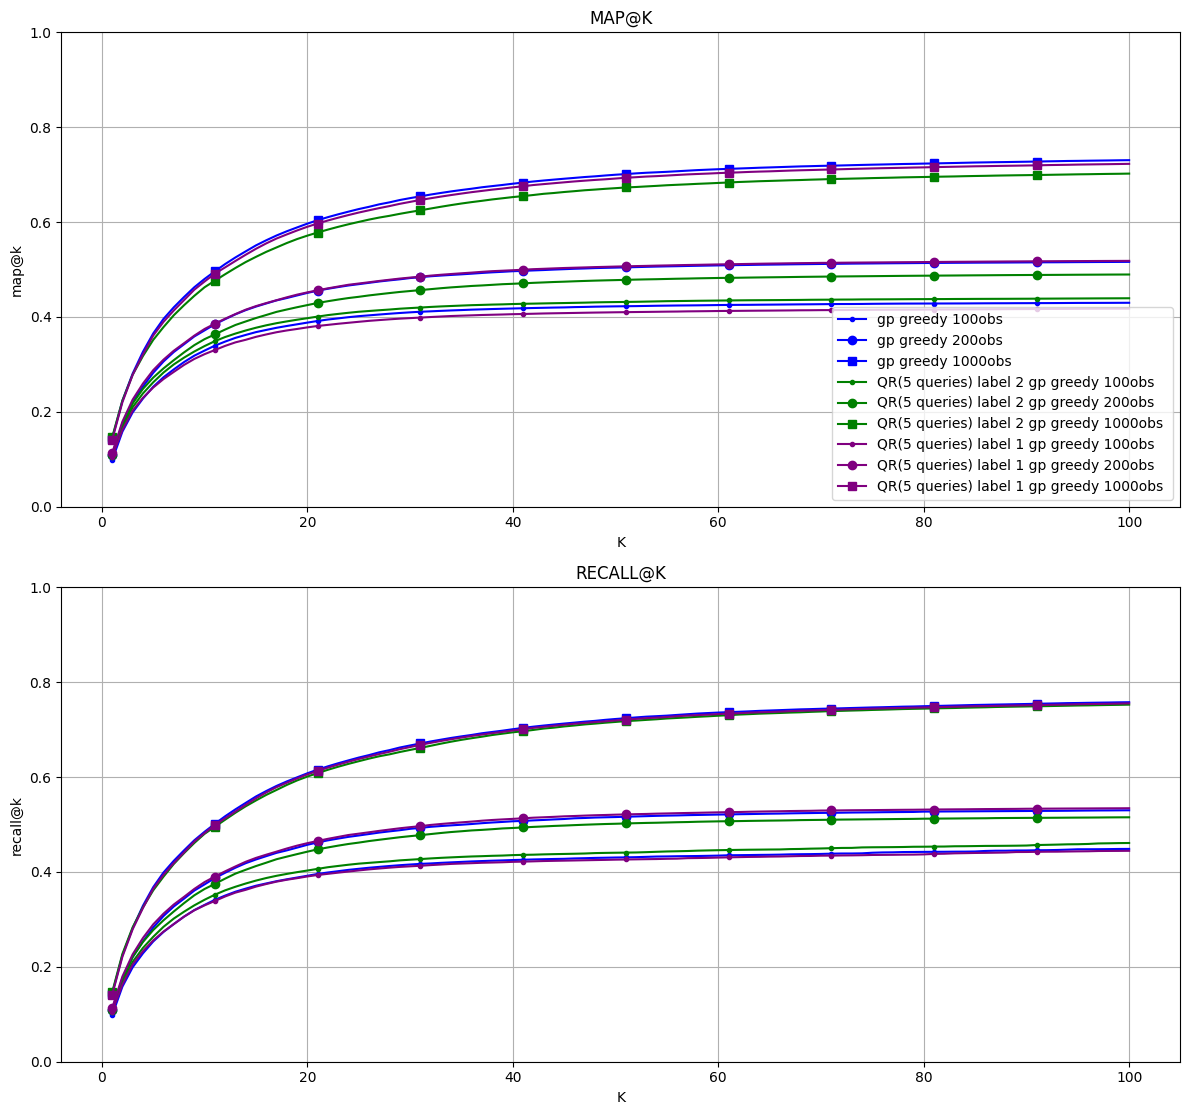

In [13]:
method_paths =  [
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0-200obs',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/1000_obs/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-2',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-2-200obs',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-2-1000obs',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-1-200obs',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/q-reform/gr-eps/0-label-1-1000obs',
                ]


method_names = [
            'gp greedy 100obs',
            'gp greedy 200obs',
            'gp greedy 1000obs',
            'QR(5 queries) label 2 gp greedy 100obs ',
            'QR(5 queries) label 2 gp greedy 200obs ',
            'QR(5 queries) label 2 gp greedy 1000obs ',
            'QR(5 queries) label 1 gp greedy 100obs ',
            'QR(5 queries) label 1 gp greedy 200obs ',
            'QR(5 queries) label 1 gp greedy 1000obs ',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': 'o', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': 's', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'green', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'green', 'marker': 'o', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'green', 'marker': 's', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'purple', 'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'purple', 'marker': 'o', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'purple', 'marker': 's', 'markevery': 10},
]


metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


## Gemini-48 vs MiniLM (384 dims)



### Acquistion functions for untuned GP, RBF (l = 1, sigma_signal = 1, sigma_obs = 1), vs. dense vs. dense oracle, 100 observations, gt_observations (no noise)

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

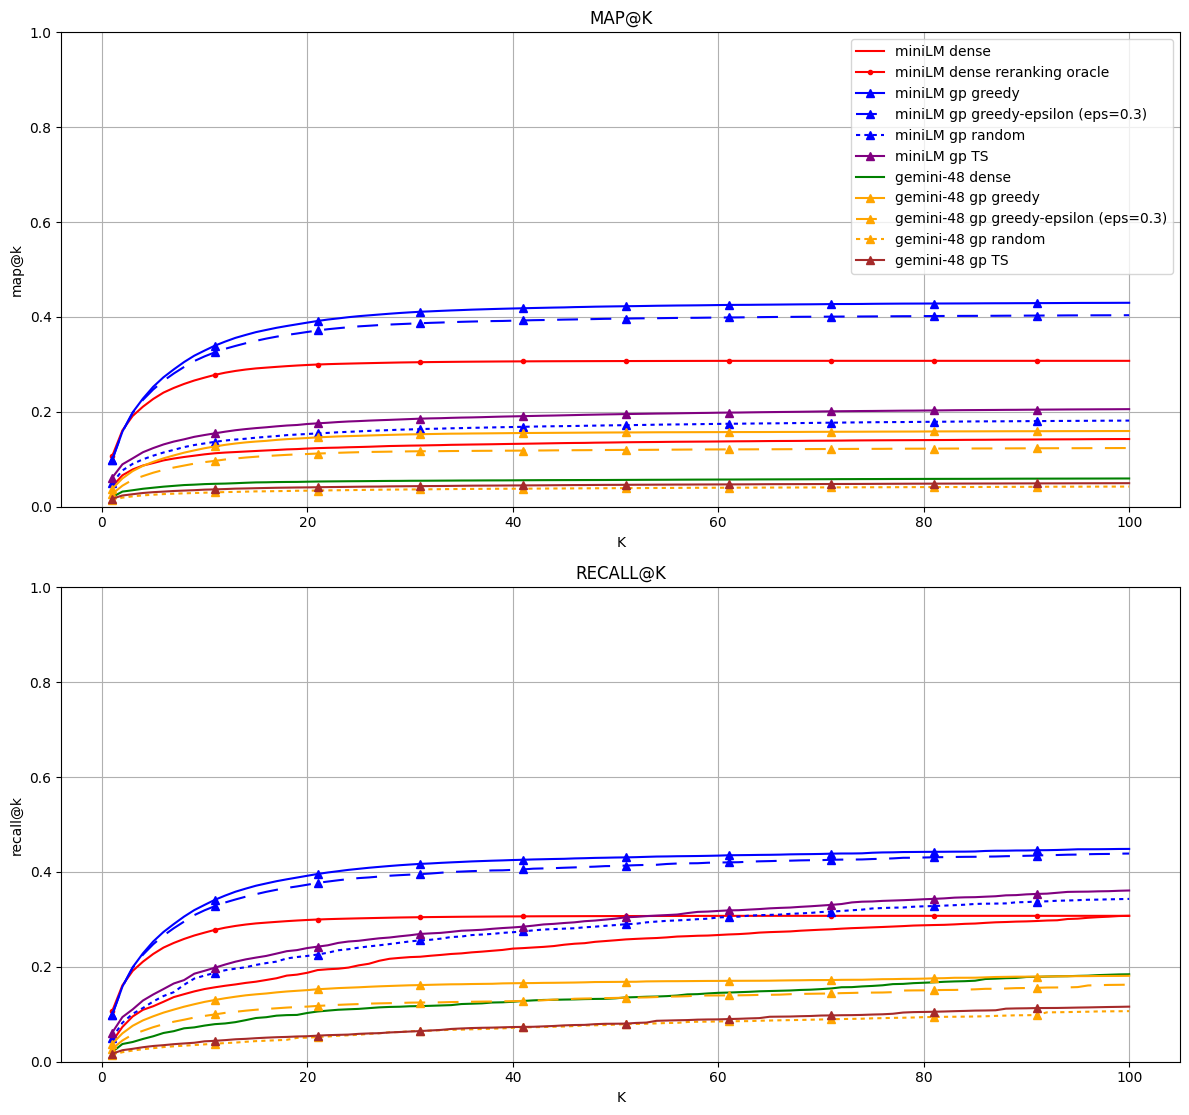

In [56]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/gr-eps/1',
                'trials/ir/nfcorpus/gp/untuned/miniLM/no_refit/ts',
                #------------gemini-48
                'trials/ir/nfcorpus/dense/gemini-48',
                #'trials/ir/nfcorpus/oracle/gemini-48/100',
                'trials/ir/nfcorpus/gp/untuned/gemini-48/gr-eps/0',
                'trials/ir/nfcorpus/gp/untuned/gemini-48/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/untuned/gemini-48/gr-eps/1',
                'trials/ir/nfcorpus/gp/untuned/gemini-48/ts'
                ]


method_names = [
            'miniLM dense',
            'miniLM dense reranking oracle',
            'miniLM gp greedy',
            'miniLM gp greedy-epsilon (eps=0.3)',
            'miniLM gp random',
            'miniLM gp TS',
            'gemini-48 dense',
            #'gemini-48 dense reranking oracle',
            'gemini-48 gp greedy',
            'gemini-48 gp greedy-epsilon (eps=0.3)',
            'gemini-48 gp random',
            'gemini-48 gp TS'
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'blue', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'purple', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'green'},
    {'linestyle': 'solid', 'color': 'orange', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (10, 6)), 'color': 'orange', 'marker': '^', 'markevery': 10},
    {'linestyle': (0, (2, 2)),  'color': 'orange', 'marker': '^', 'markevery': 10},
    {'linestyle': 'solid',  'color': 'brown', 'marker': '^', 'markevery': 10},
]


metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


## MiniLM acquisition tuned


Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

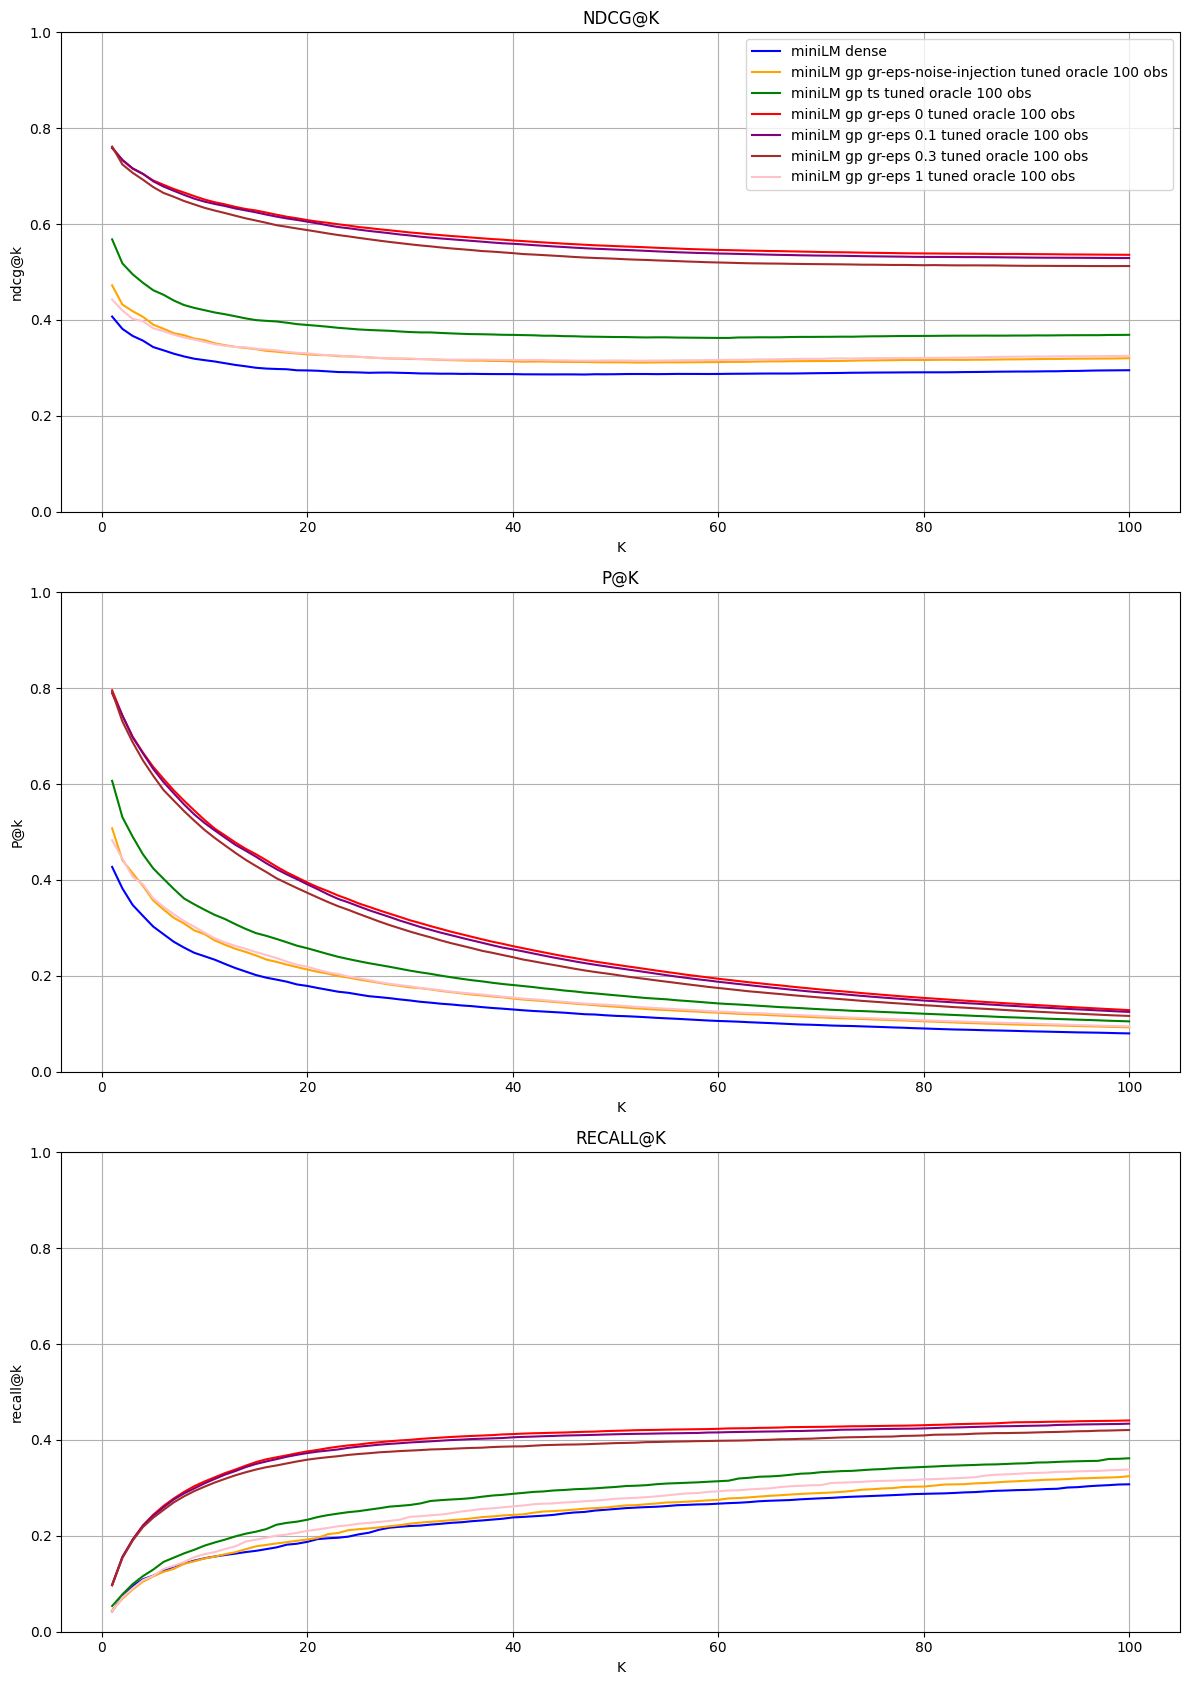

In [6]:
#note this is gr-eps with added noise, ts implementation not checked
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps-noise-injection',
                'trials/ir/nfcorpus/gp/tuned/miniLM/ts',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/0',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/0.1',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/0.3',
                'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps/1',
                #'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps-ts/0.1',
                #'trials/ir/nfcorpus/gp/tuned/miniLM/gr-eps-ts/0.3'
                ]

method_names = [
            'miniLM dense',
            'miniLM gp gr-eps-noise-injection tuned oracle 100 obs',
            'miniLM gp ts tuned oracle 100 obs',
            'miniLM gp gr-eps 0 tuned oracle 100 obs',
            'miniLM gp gr-eps 0.1 tuned oracle 100 obs',
            'miniLM gp gr-eps 0.3 tuned oracle 100 obs',
            'miniLM gp gr-eps 1 tuned oracle 100 obs',
            #'miniLM gp gr-eps-ts 0.1 tuned oracle 100 obs',
            #'miniLM gp gr-eps-ts 0.3 tuned oracle 100 obs',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'solid', 'color': 'orange'},
    {'linestyle': 'solid', 'color': 'green'},
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'purple'},
    {'linestyle': 'solid', 'color': 'brown'},
    {'linestyle': 'solid', 'color': 'pink'},
    #{'linestyle': 'solid', 'color': 'cyan'},
    #{'linestyle': 'solid', 'color': 'magenta'},
    #{'linestyle': 'solid', 'color': 'red'},
    #{'linestyle': 'solid', 'color': 'purple'},
]

metrics = ['ndcg', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


# BEIR Oracle


## NFCorpus

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

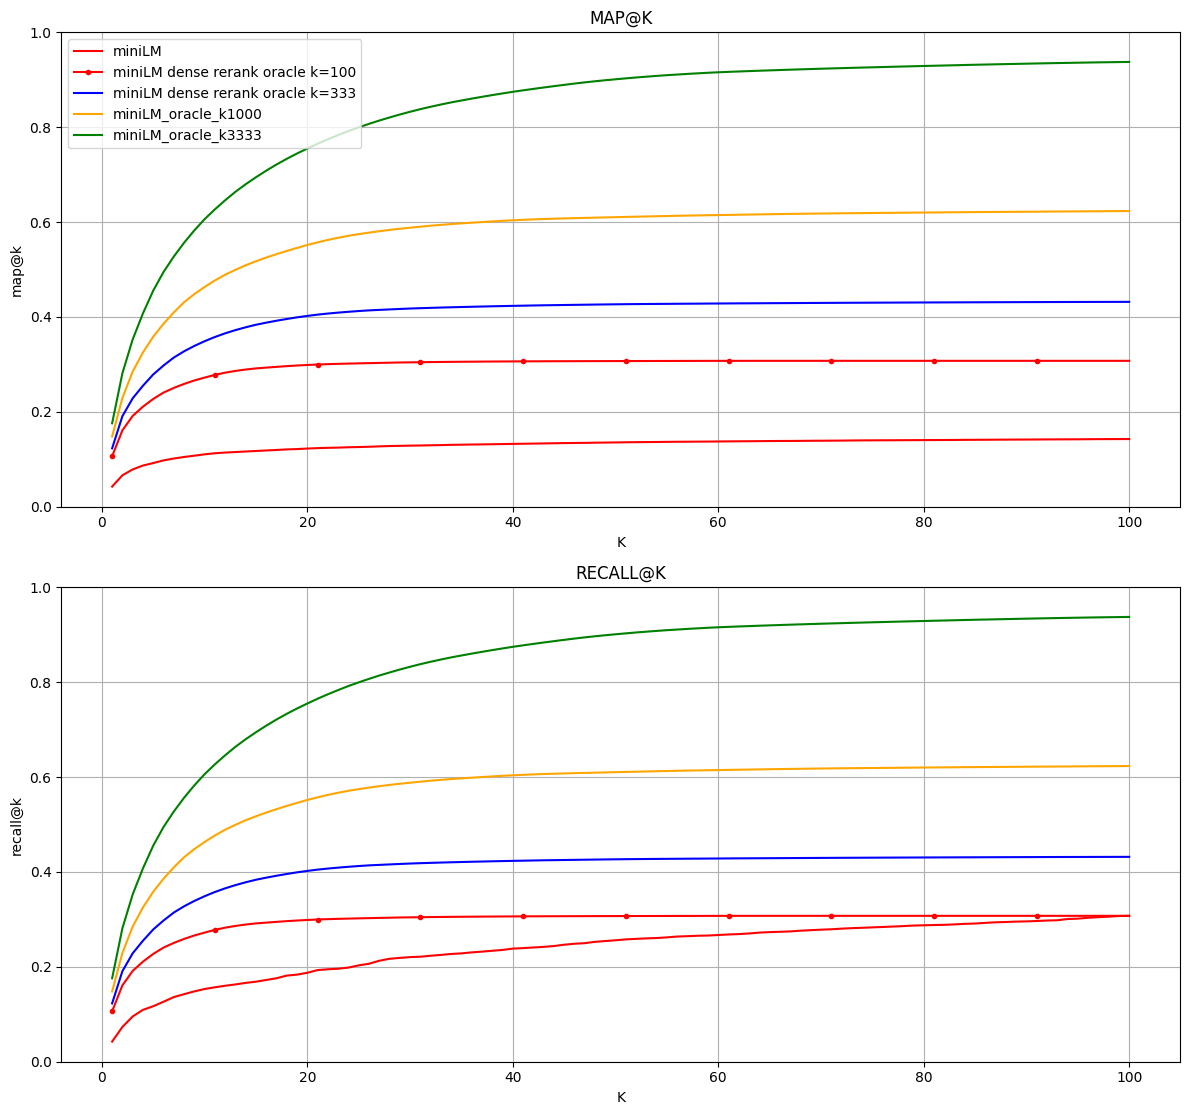

In [55]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/oracle/miniLM/100',
                'trials/ir/nfcorpus/oracle/miniLM/333',
                'trials/ir/nfcorpus/oracle/miniLM/1000',
                'trials/ir/nfcorpus/oracle/miniLM/3333',
                ]

method_names = [
            'miniLM',
            'miniLM dense rerank oracle k=100',
            'miniLM dense rerank oracle k=333',
            'miniLM_oracle_k1000',
            'miniLM_oracle_k3333',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'red',  'marker': '.', 'markevery': 10},
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'solid', 'color': 'orange'},
    {'linestyle': 'solid', 'color': 'green'},
    #{'linestyle': 'solid', 'color': 'red'},
    #{'linestyle': 'solid', 'color': 'purple'},
]

metrics = ['map', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


# BEIR Dense


## NFCorpus embedding comparison

TODO: Try much shorter query

Loading data...
Columns: ['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10', 'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19', 'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28', 'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37', 'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46', 'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55', 'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64', 'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70', 'P_71', 'P_72', 'P_73', 'P_74', 'P_75', 'P_76', 'P_77', 'P_78', 'P_79', 'P_80', 'P_81', 'P_82', 'P_83', 'P_84', 'P_85', 'P_86', 'P_87', 'P_88', 'P_89', 'P_90', 'P_91', 'P_92', 'P_93', 'P_94', 'P_95', 'P_96', 'P_97', 'P_98', 'P_99', 'P_100', 'P_101', 'P_102', 'P_103', 'P_104', 'P_105', 'P_106', 'P_107', 'P_108', 'P_109', 'P_110', 'P_111', 'P_112', 'P_113', 'P_114', 'P_115', 'P_116', 'P_117', 'P_118', 'P_119', 'P_120', 'P

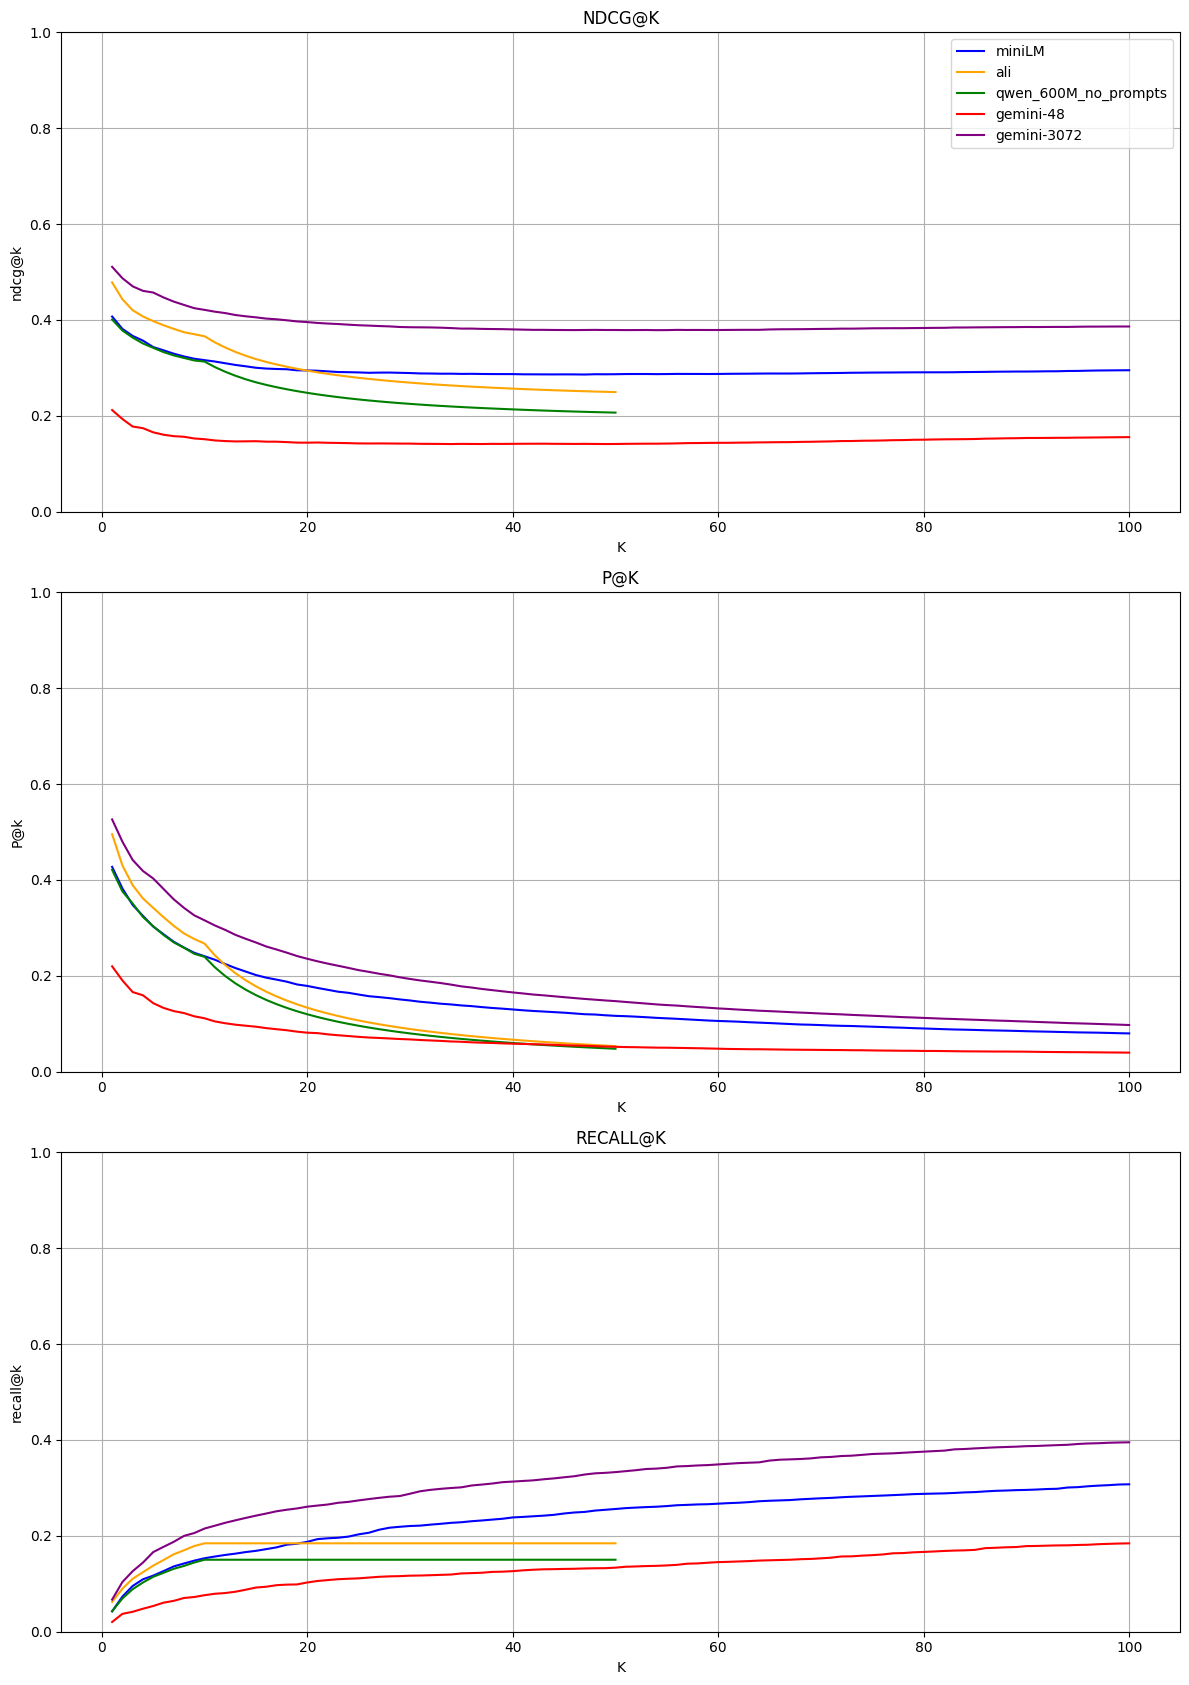

In [15]:
method_paths =  [
                'trials/ir/nfcorpus/dense/miniLM',
                'trials/ir/nfcorpus/dense/ali',
                'trials/ir/nfcorpus/dense/qwen_600M/no_prompts',
                'trials/ir/nfcorpus/dense/gemini-48',
                'trials/ir/nfcorpus/dense/gemini-3072',
                #'trials/ir/nfcorpus/dense/qwen_600M/doc_prompt_beir_sum',
                #'trials/ir/nfcorpus/dense/qwen_600M/query_prompt_beir_sum',
                #'trials/ir/nfcorpus/dense/qwen_600M/query_doc_prompt_beir_sum',
                ]

method_names = [
            'miniLM',
            'ali',
            'qwen_600M_no_prompts',
            'gemini-48',
            'gemini-3072',
            #'qwen_600M_doc_prompts',
            #'qwen_600M_query_prompts_beir_sum',
            #'qwen_600M_query_doc_prompts_beir_sum',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'solid', 'color': 'orange'},
    {'linestyle': 'solid', 'color': 'green'},
    {'linestyle': 'solid', 'color': 'red'},
    {'linestyle': 'solid', 'color': 'purple'},
    #{'linestyle': 'dashed', 'color': 'red'},
    #{'linestyle': 'dashed', 'color': 'purple'},
]

metrics = ['ndcg', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=100, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "")


# Dense Basic Tests


## Toy city various embedders

Loading data...
Columns: ['ndcg_cut_1', 'ndcg_cut_2', 'ndcg_cut_3', 'ndcg_cut_4', 'ndcg_cut_5', 'ndcg_cut_6', 'ndcg_cut_7', 'ndcg_cut_8', 'ndcg_cut_9', 'ndcg_cut_10', 'ndcg_cut_11', 'ndcg_cut_12', 'ndcg_cut_13', 'ndcg_cut_14', 'ndcg_cut_15', 'ndcg_cut_16', 'ndcg_cut_17', 'ndcg_cut_18', 'ndcg_cut_19', 'ndcg_cut_20', 'ndcg_cut_21', 'ndcg_cut_22', 'ndcg_cut_23', 'ndcg_cut_24', 'ndcg_cut_25', 'ndcg_cut_26', 'ndcg_cut_27', 'ndcg_cut_28', 'ndcg_cut_29', 'ndcg_cut_30', 'ndcg_cut_31', 'ndcg_cut_32', 'ndcg_cut_33', 'ndcg_cut_34', 'ndcg_cut_35', 'ndcg_cut_36', 'ndcg_cut_37', 'ndcg_cut_38', 'ndcg_cut_39', 'ndcg_cut_40', 'ndcg_cut_41', 'ndcg_cut_42', 'ndcg_cut_43', 'ndcg_cut_44', 'ndcg_cut_45', 'ndcg_cut_46', 'ndcg_cut_47', 'ndcg_cut_48', 'ndcg_cut_49', 'ndcg_cut_50', 'map_cut_1', 'map_cut_2', 'map_cut_3', 'map_cut_4', 'map_cut_5', 'map_cut_6', 'map_cut_7', 'map_cut_8', 'map_cut_9', 'map_cut_10', 'map_cut_11', 'map_cut_12', 'map_cut_13', 'map_cut_14', 'map_cut_15', 'map_cut_16', 'map_cut_17', 'map

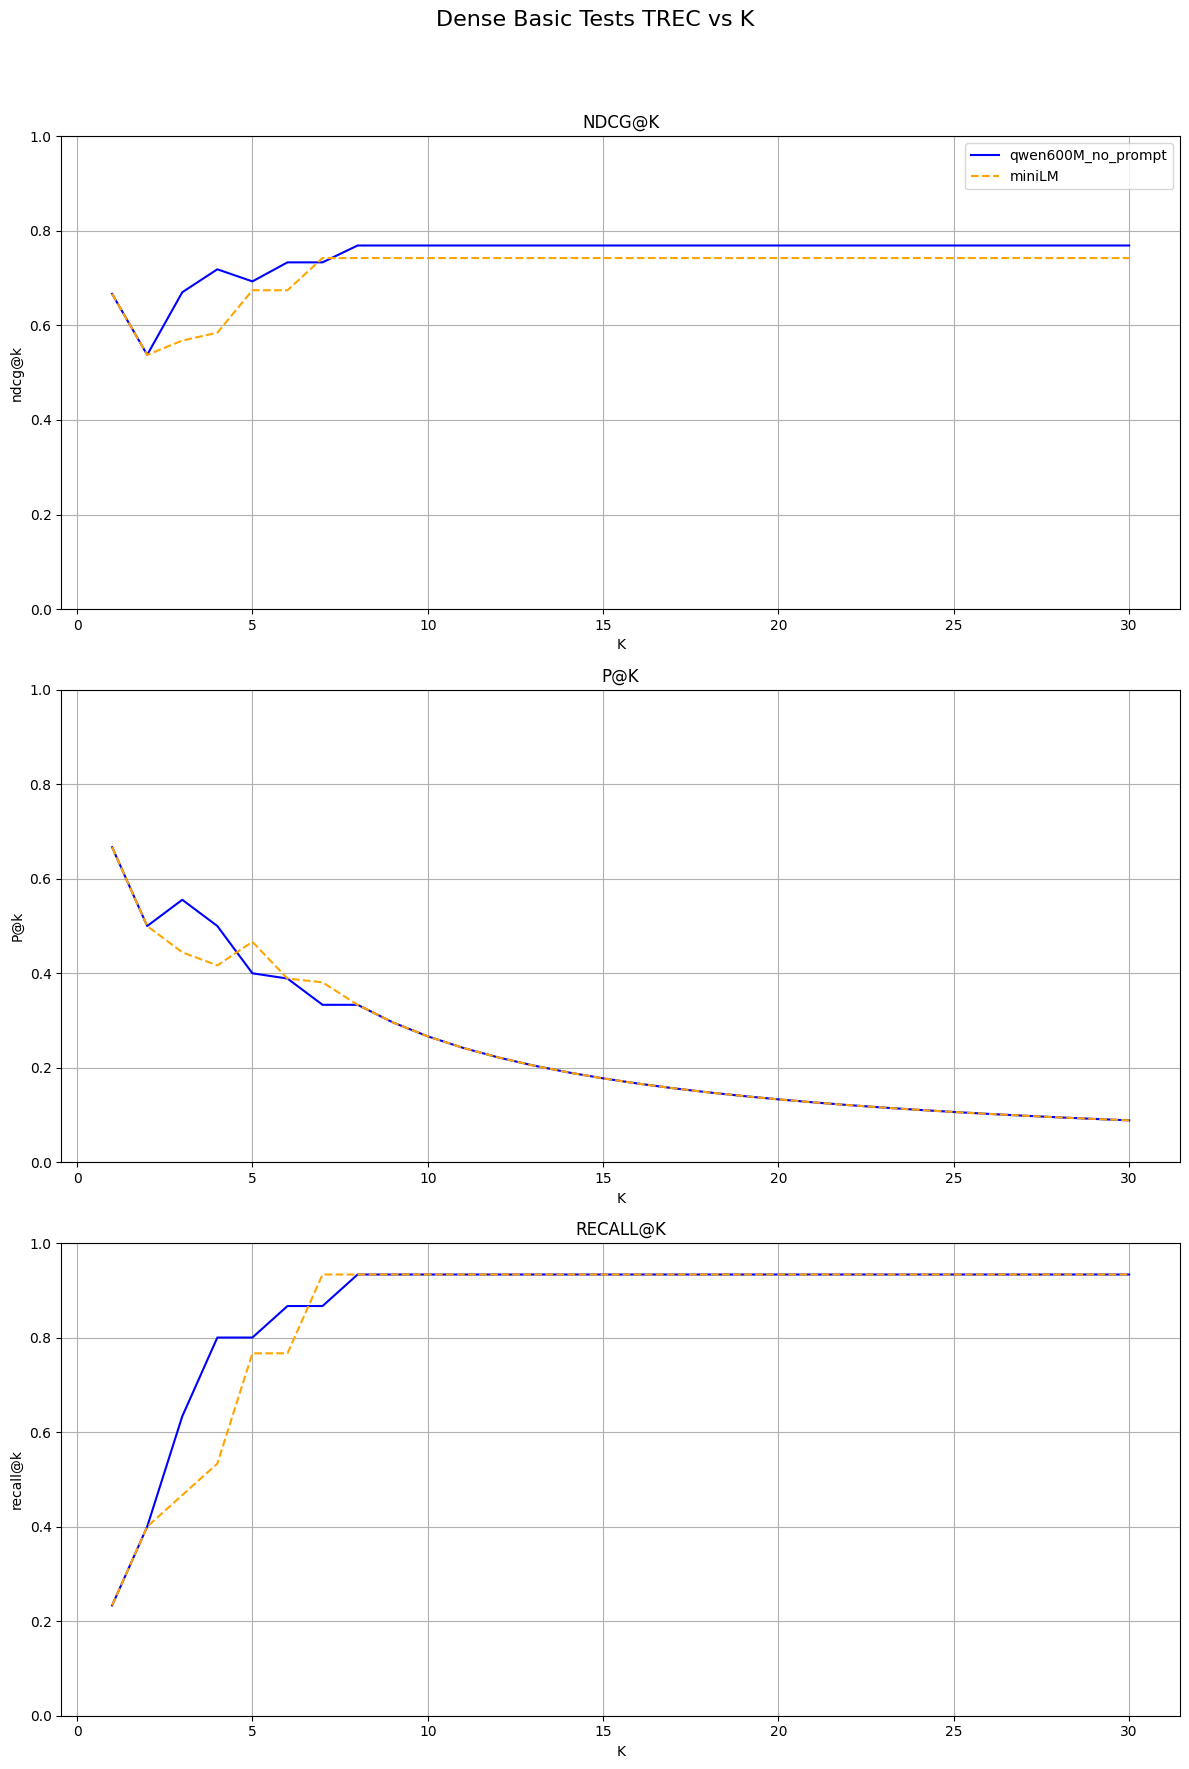

In [9]:
method_paths =  [
                'trials/ir/toy_cities/qwen_600M_no_prompt/shelve',
                'trials/ir/toy_cities/miniLM/shelve',
                ]

method_names = [
            'qwen600M_no_prompt',
            'miniLM'
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'dashed', 'color': 'orange'},
]

metrics = ['ndcg', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=30, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "Dense Basic Tests TREC vs K")


## faiss vs shelve vs single tensor

Loading data...
Columns: ['ndcg_cut_1', 'ndcg_cut_2', 'ndcg_cut_3', 'ndcg_cut_4', 'ndcg_cut_5', 'ndcg_cut_6', 'ndcg_cut_7', 'ndcg_cut_8', 'ndcg_cut_9', 'ndcg_cut_10', 'ndcg_cut_11', 'ndcg_cut_12', 'ndcg_cut_13', 'ndcg_cut_14', 'ndcg_cut_15', 'ndcg_cut_16', 'ndcg_cut_17', 'ndcg_cut_18', 'ndcg_cut_19', 'ndcg_cut_20', 'ndcg_cut_21', 'ndcg_cut_22', 'ndcg_cut_23', 'ndcg_cut_24', 'ndcg_cut_25', 'ndcg_cut_26', 'ndcg_cut_27', 'ndcg_cut_28', 'ndcg_cut_29', 'ndcg_cut_30', 'ndcg_cut_31', 'ndcg_cut_32', 'ndcg_cut_33', 'ndcg_cut_34', 'ndcg_cut_35', 'ndcg_cut_36', 'ndcg_cut_37', 'ndcg_cut_38', 'ndcg_cut_39', 'ndcg_cut_40', 'ndcg_cut_41', 'ndcg_cut_42', 'ndcg_cut_43', 'ndcg_cut_44', 'ndcg_cut_45', 'ndcg_cut_46', 'ndcg_cut_47', 'ndcg_cut_48', 'ndcg_cut_49', 'ndcg_cut_50', 'map_cut_1', 'map_cut_2', 'map_cut_3', 'map_cut_4', 'map_cut_5', 'map_cut_6', 'map_cut_7', 'map_cut_8', 'map_cut_9', 'map_cut_10', 'map_cut_11', 'map_cut_12', 'map_cut_13', 'map_cut_14', 'map_cut_15', 'map_cut_16', 'map_cut_17', 'map

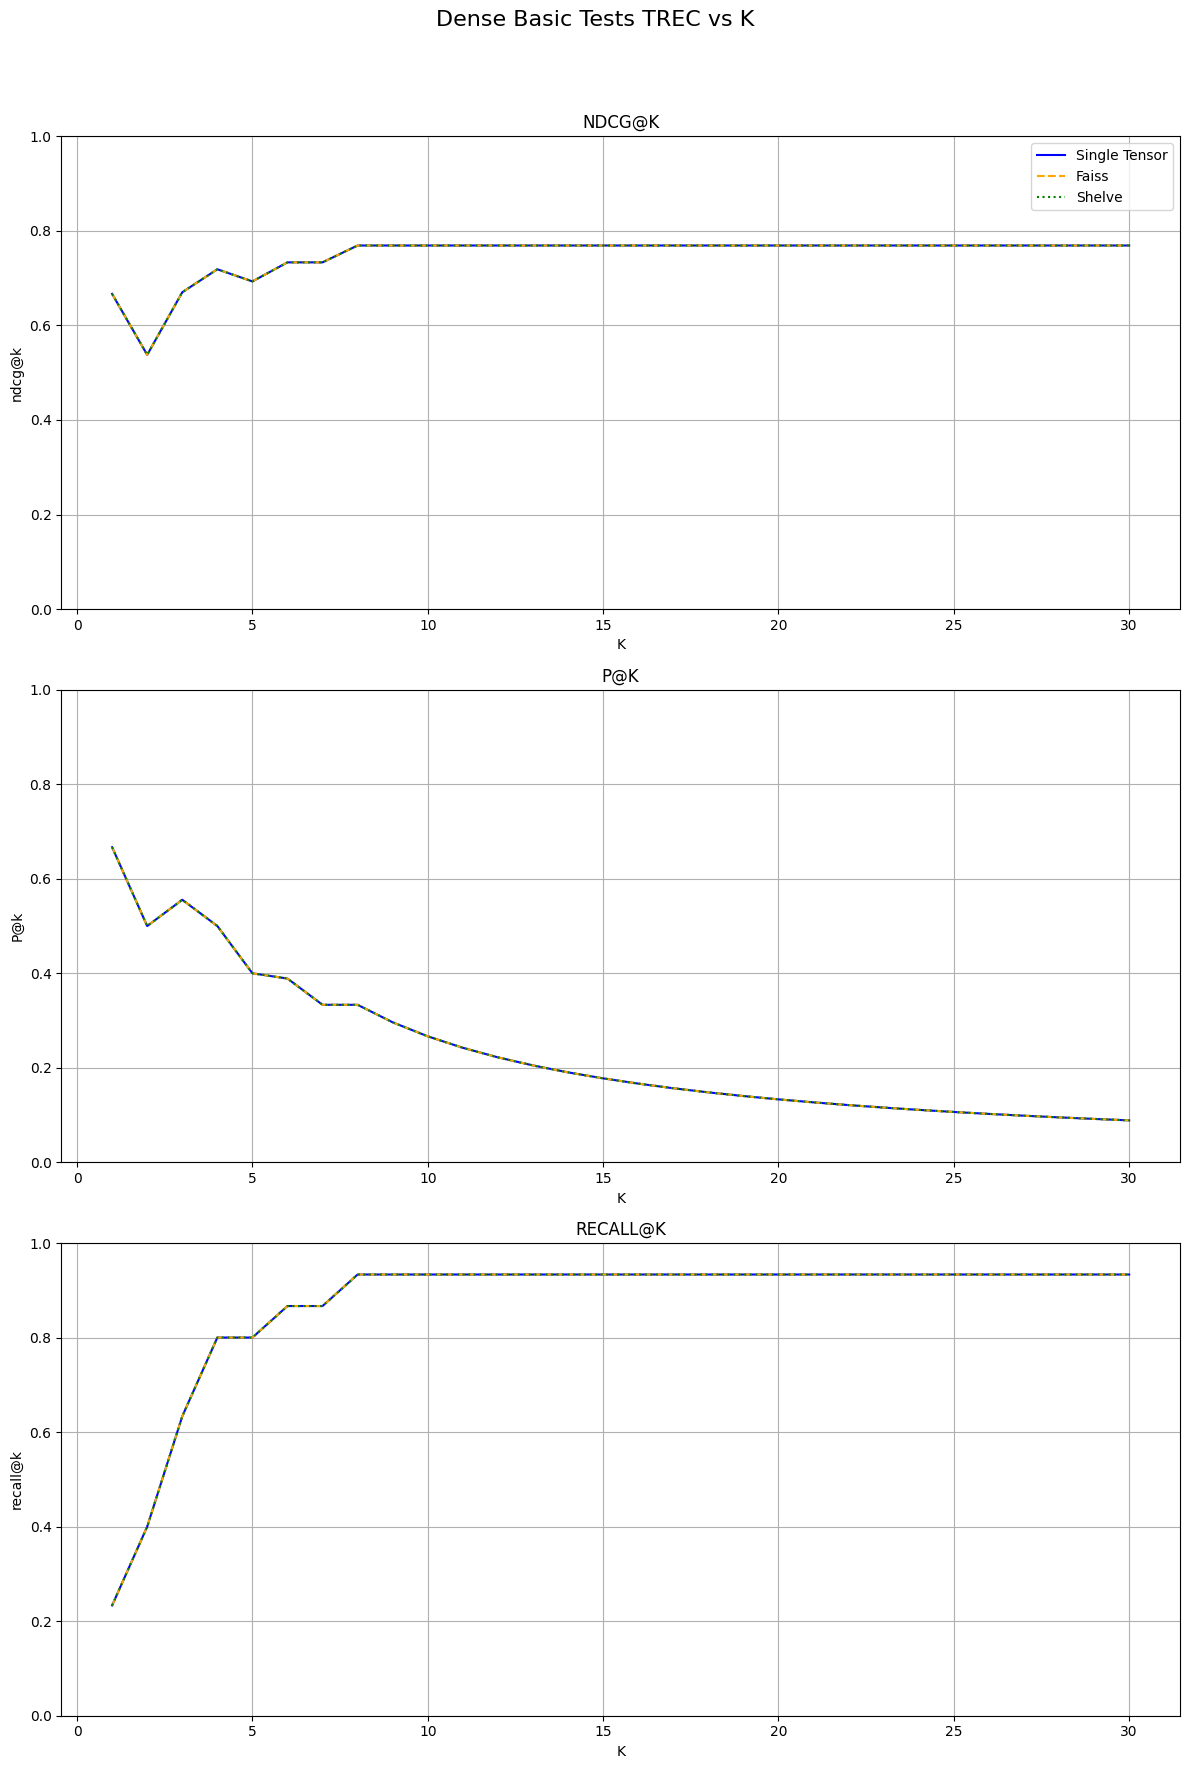

In [6]:
method_paths =  [
                'trials/ir/toy_cities/qwen_600M_no_prompt/single_tensor',
                'trials/ir/toy_cities/qwen_600M_no_prompt/faiss',
                'trials/ir/toy_cities/qwen_600M_no_prompt/shelve',
                ]

method_names = [
            'Single Tensor',
            'Faiss',
            'Shelve',
]

line_styles = [
    {'linestyle': 'solid', 'color': 'blue'},
    {'linestyle': 'dashed', 'color': 'orange'},
    {'linestyle': 'dotted', 'color': 'green'},
]

metrics = ['ndcg', 'P', 'recall']

plot_trec_metrics_vs_k(step_size=1, k=30, metrics=metrics, method_paths = method_paths, method_names=method_names, line_styles=line_styles,
              title = "Dense Basic Tests TREC vs K")


In [10]:
import os
print("CWD:", os.getcwd())

CWD: c:\Users\anton\source\repos\nl-pe


In [12]:
import os
print(os.path.exists("trials/ir/toy_cities/single_tensor/all_queries_trec_eval_results.jsonl"))


True
